In [72]:
import vice
import numpy as np
import matplotlib.pyplot as plt

from src.plots.utils import (zheights, weighted_median, filter_multioutput_stars)
from src.plots.plots.utils import (named_colors, mpl_loc, markers, xticklabel_formatter, dummy_background_axes)
from src.plots.plots import age_ofe

ZONE_WIDTH = 0.1
MIN_RGAL = 7
MAX_RGAL = 9
MIN_ABSZ = 0
MAX_ABXZ = 0.5
ZONE_MIN = int(MIN_RGAL / ZONE_WIDTH)
ZONE_MAX = int((MAX_RGAL - ZONE_WIDTH) / ZONE_WIDTH)
COLORMAP = "winter"

In [56]:
output = vice.output('outputs/diffusion/insideout/insideout')

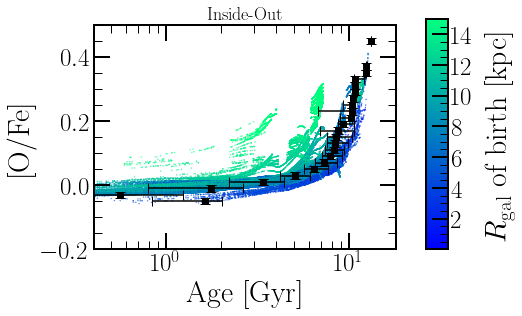

In [57]:
fig, ax = plt.subplots()

output.stars["abszfinal"] = [abs(k) for k in zheights(output.name)[:output.stars.size[0]]]
stars = filter_multioutput_stars(output.stars, ZONE_MIN, ZONE_MAX,
    MIN_ABSZ, MAX_ABSZ)
colors = [ZONE_WIDTH * (i + 0.5) for i in stars["zone_origin"]]
sc = ax.scatter(stars["age"], stars["[O/Fe]"], c = colors, s = 0.1,
    cmap = plt.get_cmap(COLORMAP), vmin = 0, vmax = 15, rasterized = True)

cbar_ax = plt.gcf().add_axes([0.92, 0.1, 0.05, 0.8])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label(r"$R_{\rm{gal}}$ of birth [kpc]", labelpad = 10)
cbar.set_ticks(range(2, 16, 2))
plt.subplots_adjust(hspace = 0, wspace = 0, left = 0.15, bottom = 0.1,
    right = 0.85)

# measure population-averaged trend
ages = (len(BINS) - 1) * [0.]
lowers = (len(BINS) - 1) * [0.]
uppers = (len(BINS) - 1) * [0.]
for i in range(len(ages)):
    stars_ = stars.filter("[O/Fe]", ">=", BINS[i])
    stars_ = stars_.filter("[O/Fe]", "<=", BINS[i + 1])
    if len(stars_["age"]) > 20:
        masses = [a * (1 - vice.cumulative_return_fraction(b)) for a, b in
            zip(stars_["mass"], stars_["age"])]
        ages[i] = weighted_median(stars_["age"], masses)
        lowers[i] = weighted_median(stars_["age"], masses, stop = 0.16)
        uppers[i] = weighted_median(stars_["age"], masses, stop = 0.84)
    else:
        ages[i] = lowers[i] = uppers[i] = float("nan")

# plot black squares and error bars for trend in mass-weighted median
xerr = [
    [ages[i] - lowers[i] for i in range(len(ages))],
    [uppers[i] - ages[i] for i in range(len(ages))]
]
kwargs = {
    "xerr": 		xerr,
    "yerr": 		(BINS[1] - BINS[0]) / 2.,
    "c": 			named_colors()["black"],
    "marker": 		markers()["square"],
    "linestyle": 	"None"
}
ax.errorbar(ages, [(a + b) / 2. for a, b in zip(BINS[1:], BINS[:-1])],
    **kwargs)

ax.set_xscale('log')
ax.set_xlim(0.4, 18)
ax.set_ylim(-0.2, 0.5)
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[O/Fe]')
ax.set_title('Inside-Out', size=18)
plt.show()

In [37]:
output = vice.output('outputs/diffusion/insideout/powerlaw')

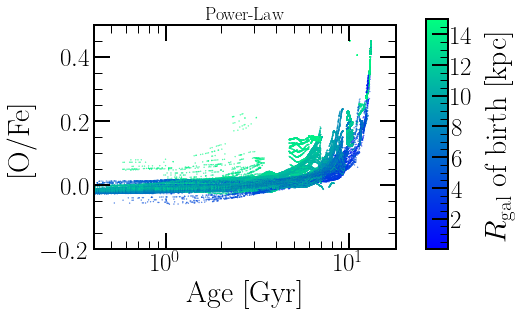

In [38]:
fig, ax = plt.subplots()

output.stars["abszfinal"] = [abs(k) for k in zheights(output.name)[:output.stars.size[0]]]
stars = filter_multioutput_stars(output.stars, ZONE_MIN, ZONE_MAX,
    MIN_ABSZ, MAX_ABSZ)
colors = [ZONE_WIDTH * (i + 0.5) for i in stars["zone_origin"]]
sc = ax.scatter(stars["age"], stars["[O/Fe]"], c = colors, s = 0.1,
    cmap = plt.get_cmap(COLORMAP), vmin = 0, vmax = 15, rasterized = True)

cbar_ax = plt.gcf().add_axes([0.92, 0.1, 0.05, 0.8])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label(r"$R_{\rm{gal}}$ of birth [kpc]", labelpad = 10)
cbar.set_ticks(range(2, 16, 2))
plt.subplots_adjust(hspace = 0, wspace = 0, left = 0.15, bottom = 0.1,
    right = 0.85)

ax.set_xscale('log')
ax.set_xlim(0.4, 18)
ax.set_ylim(-0.2, 0.5)
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[O/Fe]')
ax.set_title('Power-Law', size=18)
plt.show()

In [39]:
output = vice.output('outputs/diffusion/insideout/exponential')

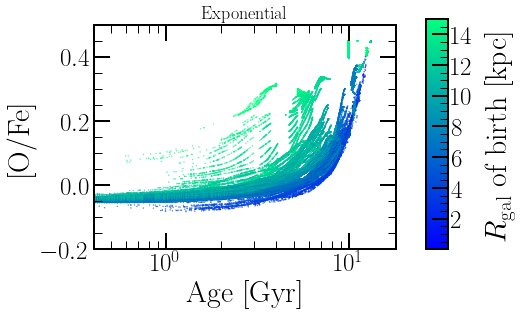

In [40]:
fig, ax = plt.subplots()

output.stars["abszfinal"] = [abs(k) for k in zheights(output.name)[:output.stars.size[0]]]
stars = filter_multioutput_stars(output.stars, ZONE_MIN, ZONE_MAX,
    MIN_ABSZ, MAX_ABSZ)
colors = [ZONE_WIDTH * (i + 0.5) for i in stars["zone_origin"]]
sc = ax.scatter(stars["age"], stars["[O/Fe]"], c = colors, s = 0.1,
    cmap = plt.get_cmap(COLORMAP), vmin = 0, vmax = 15, rasterized = True)

cbar_ax = plt.gcf().add_axes([0.92, 0.1, 0.05, 0.8])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label(r"$R_{\rm{gal}}$ of birth [kpc]", labelpad = 10)
cbar.set_ticks(range(2, 16, 2))
plt.subplots_adjust(hspace = 0, wspace = 0, left = 0.15, bottom = 0.1,
    right = 0.85)

ax.set_xscale('log')
ax.set_xlim(0.4, 18)
ax.set_ylim(-0.2, 0.5)
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[O/Fe]')
ax.set_title('Exponential', size=18)
plt.show()

In [41]:
output = vice.output('outputs/diffusion/insideout/bimodal')

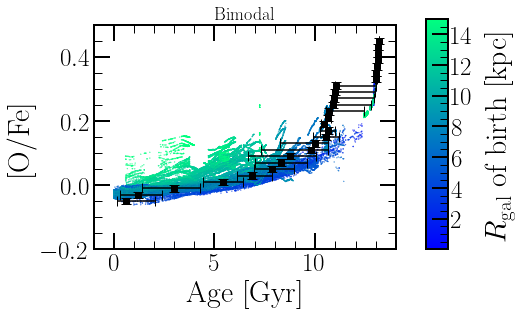

In [55]:
fig, ax = plt.subplots()

output.stars["abszfinal"] = [abs(k) for k in zheights(output.name)[:output.stars.size[0]]]
stars = filter_multioutput_stars(output.stars, ZONE_MIN, ZONE_MAX,
    MIN_ABSZ, MAX_ABSZ)
colors = [ZONE_WIDTH * (i + 0.5) for i in stars["zone_origin"]]
sc = ax.scatter(stars["age"], stars["[O/Fe]"], c = colors, s = 0.1,
    cmap = plt.get_cmap(COLORMAP), vmin = 0, vmax = 15, rasterized = True)

# measure population-averaged trend
ages = (len(BINS) - 1) * [0.]
lowers = (len(BINS) - 1) * [0.]
uppers = (len(BINS) - 1) * [0.]
for i in range(len(ages)):
    stars_ = stars.filter("[O/Fe]", ">=", BINS[i])
    stars_ = stars_.filter("[O/Fe]", "<=", BINS[i + 1])
    if len(stars_["age"]) > 20:
        masses = [a * (1 - vice.cumulative_return_fraction(b)) for a, b in
            zip(stars_["mass"], stars_["age"])]
        ages[i] = weighted_median(stars_["age"], masses)
        lowers[i] = weighted_median(stars_["age"], masses, stop = 0.16)
        uppers[i] = weighted_median(stars_["age"], masses, stop = 0.84)
    else:
        ages[i] = lowers[i] = uppers[i] = float("nan")

# plot black squares and error bars for trend in mass-weighted median
xerr = [
    [ages[i] - lowers[i] for i in range(len(ages))],
    [uppers[i] - ages[i] for i in range(len(ages))]
]
kwargs = {
    "xerr": 		xerr,
    "yerr": 		(BINS[1] - BINS[0]) / 2.,
    "c": 			named_colors()["black"],
    "marker": 		markers()["square"],
    "linestyle": 	"None"
}
ax.errorbar(ages, [(a + b) / 2. for a, b in zip(BINS[1:], BINS[:-1])],
    **kwargs)

cbar_ax = plt.gcf().add_axes([0.92, 0.1, 0.05, 0.8])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label(r"$R_{\rm{gal}}$ of birth [kpc]", labelpad = 10)
cbar.set_ticks(range(2, 16, 2))
plt.subplots_adjust(hspace = 0, wspace = 0, left = 0.15, bottom = 0.1,
    right = 0.85)

# ax.set_xscale('log')
ax.set_xlim(-1, 14)
ax.set_ylim(-0.2, 0.5)
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[O/Fe]')
ax.set_title('Bimodal', size=18)
plt.show()

In [45]:
output.stars

vice.dataframe{
    formation_time -> [0, 0, 0, ... , 13.2, 13.2, 13.2]
    zone_origin ----> [0, 0, 0, ... , 199, 199, 199]
    zone_final -----> [17, 18, 30, ... , 199, 199, 199]
    mass -----------> [0, 0, 0, ... , 0, 0, 0]
    z(fe) ----------> [0, 0, 0, ... , 1.03454e+12, 1.03454e+12, 1.03454e+12]
    z(o) -----------> [0, 0, 0, ... , 6.78023e+12, 6.78023e+12, 6.78023e+12]
    abszfinal ------> [2.33, 0.14, 1, ... , 0.65, 0.65, 0.65]
    [fe/h] ---------> [-inf, -inf, -inf, ... , 14.9042, 14.9042, 14.9042]
    [o/h] ----------> [-inf, -inf, -inf, ... , 15.0738, 15.0738, 15.0738]
    [o/fe] ---------> [nan, nan, nan, ... , 0.169693, 0.169693, 0.169693]
    z --------------> [0, 0, 0, ... , 1.56072e+13, 1.56072e+13, 1.56072e+13]
    [m/h] ----------> [-inf, -inf, -inf, ... , 15.0472, 15.0472, 15.0472]
    age ------------> [13.2, 13.2, 13.2, ... , 0, 0, 0]
}

In [53]:
output.zones['zone0'].history

vice.dataframe{
    time -----------> [0, 0.01, 0.02, ... , 13.19, 13.2, 13.21]
    mgas -----------> [1e-12, 336779, 408181, ... , 4.15431e+06, 4.14849e+06, 4.14268e+06]
    mstar ----------> [0, 909.363, 2026.13, ... , 3.0489e+07, 3.04988e+07, 3.05085e+07]
    sfr ------------> [0, 0.000100568, 0.000200283, ... , 0.00200663, 0.00200313, 0.00199964]
    ifr ------------> [nan, 0.033782, 0.00733785, ... , 0.000525693, 0.000488129, 0.000465863]
    ofr ------------> [1.38117e-316, 3.50833e-06, 6.98693e-06, ... , 7.00016e-05, 6.98797e-05, 6.9758e-05]
    eta_0 ----------> [0.0348852, 0.0348852, 0.0348852, ... , 0.0348852, 0.0348852, 0.0348852]
    r_eff ----------> [nan, 0.0957713, 0.10188, ... , 0.499697, 0.510235, 0.514679]
    z_in(fe) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(o) --------> [0, 0, 0, ... , 0, 0, 0]
    z_out(fe) ------> [0.5, 3.57233e-06, 8.79148e-06, ... , 0.00605174, 0.00606356, 0.00607499]
    z_out(o) -------> [0.5, 4.46541e-05, 0.000109893, ... , 0.0307589, 0.030

In [58]:
output = vice.output('outputs/diffusion/lateburst/lateburst')

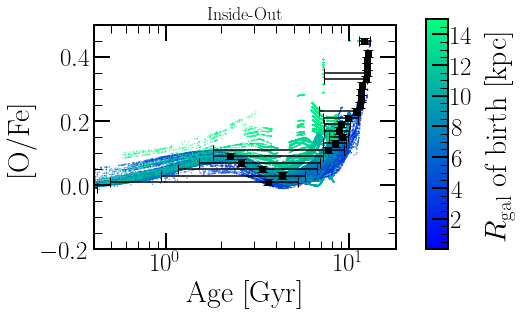

In [59]:
fig, ax = plt.subplots()

output.stars["abszfinal"] = [abs(k) for k in zheights(output.name)[:output.stars.size[0]]]
stars = filter_multioutput_stars(output.stars, ZONE_MIN, ZONE_MAX,
    MIN_ABSZ, MAX_ABSZ)
colors = [ZONE_WIDTH * (i + 0.5) for i in stars["zone_origin"]]
sc = ax.scatter(stars["age"], stars["[O/Fe]"], c = colors, s = 0.1,
    cmap = plt.get_cmap(COLORMAP), vmin = 0, vmax = 15, rasterized = True)

cbar_ax = plt.gcf().add_axes([0.92, 0.1, 0.05, 0.8])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label(r"$R_{\rm{gal}}$ of birth [kpc]", labelpad = 10)
cbar.set_ticks(range(2, 16, 2))
plt.subplots_adjust(hspace = 0, wspace = 0, left = 0.15, bottom = 0.1,
    right = 0.85)

# measure population-averaged trend
ages = (len(BINS) - 1) * [0.]
lowers = (len(BINS) - 1) * [0.]
uppers = (len(BINS) - 1) * [0.]
for i in range(len(ages)):
    stars_ = stars.filter("[O/Fe]", ">=", BINS[i])
    stars_ = stars_.filter("[O/Fe]", "<=", BINS[i + 1])
    if len(stars_["age"]) > 20:
        masses = [a * (1 - vice.cumulative_return_fraction(b)) for a, b in
            zip(stars_["mass"], stars_["age"])]
        ages[i] = weighted_median(stars_["age"], masses)
        lowers[i] = weighted_median(stars_["age"], masses, stop = 0.16)
        uppers[i] = weighted_median(stars_["age"], masses, stop = 0.84)
    else:
        ages[i] = lowers[i] = uppers[i] = float("nan")

# plot black squares and error bars for trend in mass-weighted median
xerr = [
    [ages[i] - lowers[i] for i in range(len(ages))],
    [uppers[i] - ages[i] for i in range(len(ages))]
]
kwargs = {
    "xerr": 		xerr,
    "yerr": 		(BINS[1] - BINS[0]) / 2.,
    "c": 			named_colors()["black"],
    "marker": 		markers()["square"],
    "linestyle": 	"None"
}
ax.errorbar(ages, [(a + b) / 2. for a, b in zip(BINS[1:], BINS[:-1])],
    **kwargs)

ax.set_xscale('log')
ax.set_xlim(0.4, 18)
ax.set_ylim(-0.2, 0.5)
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[O/Fe]')
ax.set_title('Inside-Out', size=18)
plt.show()

In [73]:
insideout_path = 'outputs/diffusion/insideout/'
age_ofe(insideout_path + 'insideout', insideout_path + 'powerlaw', insideout_path + 'exponential', insideout_path + 'bimodal', 'insideout',
        names=[['Power-Law (150 Myr minimum)', 'Power-Law (40 Myr minimum)'], ['Exponential', 'Bimodal']])

AttributeError: 'NoneType' object has no attribute 'get_subplotspec'

RuntimeError: latex was not able to process the following string:
b'$R_\\\\text{gal}$ of birth [kpc]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../b391fd8884ae9648bb5a7b5b6839aab8.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file b391fd8884ae9648bb5a7b5b6839aab8.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.18 {\rmfamily $R_\text
                        {gal}$ of birth [kpc]}
No pages of output.
Transcript written on b391fd8884ae9648bb5a7b5b6839aab8.log.




<Figure size 720x720 with 6 Axes>